# train_df에 대해서 target 비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# train_df
- 이미 스케일링 되어 있음

In [2]:
df = pd.read_csv('../data/preprocessed_train_df.csv')

In [8]:
df.shape

(1118822, 45)

In [4]:
df.columns

Index(['아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도', '좌표X', '좌표Y', 'target',
       'is_test', '가장 가까운 거리', '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리',
       '인근 버스 정류장 개수', '계약년', '계약월', 'GDP', '한국은행 기준금리', '기대 인플레이션', '지가지수',
       '아파트 인허가', '미분양', '거래량', '건설사 랭킹', '구', '구별 지가지수', '공시지가 평균', '매수우위지수',
       '건물나이', '30년이상50년이하', '구매력지수', '거래활발지수', '매매가격 지수 증감률', '매매 대비 전세가격 비율',
       '아파트 카테고리', '지하철 카테고리', '구 카테고리', '건설사 카테고리', '가장 가까운 다리와의 거리',
       '가장 가까운 다리 index', '가장 가까운 다리', '인근 한강다리 개수', '인근 다리 개수 1개이상 3개 이하',
       '학군', '계약월_sin'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 45 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   아파트명                 1118822 non-null  object 
 1   전용면적                 1118822 non-null  float64
 2   계약년월                 1118822 non-null  int64  
 3   계약일                  1118822 non-null  int64  
 4   층                    1118822 non-null  float64
 5   건축년도                 1118822 non-null  float64
 6   좌표X                  1118822 non-null  float64
 7   좌표Y                  1118822 non-null  float64
 8   target               1118822 non-null  float64
 9   is_test              1118822 non-null  int64  
 10  가장 가까운 거리            1118822 non-null  float64
 11  인근 지하철 역 개수          1118822 non-null  float64
 12  가장 가까운 버스 정류장 거리     1118822 non-null  float64
 13  인근 버스 정류장 개수         1118822 non-null  float64
 14  계약년                  1118822 non-null  int64  
 15

# 필요없는 feature 제거
- v.25.2 model 기준

In [7]:
df.columns

Index(['아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도', '좌표X', '좌표Y', 'target',
       'is_test', '가장 가까운 거리', '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리',
       '인근 버스 정류장 개수', '계약년', '계약월', 'GDP', '한국은행 기준금리', '기대 인플레이션', '지가지수',
       '아파트 인허가', '미분양', '거래량', '건설사 랭킹', '구', '구별 지가지수', '공시지가 평균', '매수우위지수',
       '건물나이', '30년이상50년이하', '구매력지수', '거래활발지수', '매매가격 지수 증감률', '매매 대비 전세가격 비율',
       '아파트 카테고리', '지하철 카테고리', '구 카테고리', '건설사 카테고리', '가장 가까운 다리와의 거리',
       '가장 가까운 다리 index', '가장 가까운 다리', '인근 한강다리 개수', '인근 다리 개수 1개이상 3개 이하',
       '학군', '계약월_sin'],
      dtype='object')

In [12]:
train_df = df.drop(['아파트명', '계약년월', '계약일', 'target', 'is_test', '계약월', '지가지수',
                    '아파트 인허가', '미분양', '구', '건물나이', '구매력지수', '거래활발지수', '건설사 랭킹',
                    '매매가격 지수 증감률', '매매 대비 전세가격 비율', '구 카테고리', '건설사 카테고리',
                    '가장 가까운 다리 index', '가장 가까운 다리', '인근 한강다리 개수', '인근 다리 개수 1개이상 3개 이하', '학군'], axis=1)

train_df.columns

Index(['전용면적', '층', '건축년도', '좌표X', '좌표Y', '가장 가까운 거리', '인근 지하철 역 개수',
       '가장 가까운 버스 정류장 거리', '인근 버스 정류장 개수', '계약년', 'GDP', '한국은행 기준금리',
       '기대 인플레이션', '거래량', '구별 지가지수', '공시지가 평균', '매수우위지수', '30년이상50년이하',
       '아파트 카테고리', '지하철 카테고리', '가장 가까운 다리와의 거리', '계약월_sin'],
      dtype='object')

# 카테고리 변수

In [13]:
train_df['아파트 카테고리'] = train_df['아파트 카테고리'].astype('category')
train_df['지하철 카테고리'] = train_df['지하철 카테고리'].astype('category')

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   전용면적              1118822 non-null  float64 
 1   층                 1118822 non-null  float64 
 2   건축년도              1118822 non-null  float64 
 3   좌표X               1118822 non-null  float64 
 4   좌표Y               1118822 non-null  float64 
 5   가장 가까운 거리         1118822 non-null  float64 
 6   인근 지하철 역 개수       1118822 non-null  float64 
 7   가장 가까운 버스 정류장 거리  1118822 non-null  float64 
 8   인근 버스 정류장 개수      1118822 non-null  float64 
 9   계약년               1118822 non-null  int64   
 10  GDP               1118822 non-null  float64 
 11  한국은행 기준금리         1118822 non-null  float64 
 12  기대 인플레이션          1118822 non-null  float64 
 13  거래량               1118822 non-null  float64 
 14  구별 지가지수           1118822 non-null  float64 
 15  공시지가 평균           1118822 non-nu

# model

In [15]:
model = joblib.load('../models/25/v_25_2.pkl')

/opt/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


# 예측

In [16]:
preds = model.predict(train_df)

In [17]:
preds

array([115844.59074612, 118197.43081316,  98771.62095556, ...,
        28573.00981861,  28073.92188137,  16670.0579488 ])

In [21]:
preds = np.round(preds).astype(int)

### 원본에 예측값 추가

In [22]:
# 원본에 예측값 추가

df['preds'] = preds

In [23]:
df

,아파트명,전용면적,계약년월,계약일,층,건축년도,좌표X,좌표Y,target,is_test,...,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수,인근 다리 개수 1개이상 3개 이하,학군,계약월_sin,preds
0,개포6차우성,0.168839,201712,8,0.095890,0.419355,0.678243,0.167126,124000.0,0,...,강남구,기타,0.347392,17.0,청담대교,0.0,0,8.0,-0.022272,115845
1,개포6차우성,0.168839,201712,22,0.109589,0.419355,0.678243,0.167126,123500.0,0,...,강남구,기타,0.347392,17.0,청담대교,0.0,0,8.0,-0.022272,118197
2,개포6차우성,0.108520,201712,28,0.123288,0.419355,0.678243,0.167126,91500.0,0,...,강남구,기타,0.347392,17.0,청담대교,0.0,0,8.0,-0.022272,98772
3,개포6차우성,0.168839,201801,3,0.109589,0.419355,0.678243,0.167126,130000.0,0,...,강남구,기타,0.347392,17.0,청담대교,0.0,0,8.0,0.684200,130428
4,개포6차우성,0.168839,201801,8,0.082192,0.419355,0.678243,0.167126,117000.0,0,...,강남구,기타,0.347392,17.0,청담대교,0.0,0,8.0,0.684200,129922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,갈현현대,0.120492,200707,12,0.205479,0.596774,0.281155,0.704836,20000.0,0,...,기타,현대,0.383051,2.0,가양대교,0.0,0,2.0,-0.728745,17517
1118818,갈현현대,0.120492,200708,25,0.191781,0.596774,0.281155,0.704836,20000.0,0,...,기타,현대,0.383051,2.0,가양대교,0.0,0,2.0,-1.245919,17385
1118819,갈현현대,0.180570,200708,31,0.328767,0.596774,0.281155,0.704836,28000.0,0,...,기타,현대,0.383051,2.0,가양대교,0.0,0,2.0,-1.245919,28573
1118820,갈현현대,0.180570,200709,15,0.164384,0.596774,0.281155,0.704836,29000.0,0,...,기타,현대,0.383051,2.0,가양대교,0.0,0,2.0,-1.435218,28074


# 데이터를 구별로 분할

In [25]:
df[['아파트명', '구', 'target', 'preds']]

,아파트명,구,target,preds
0,개포6차우성,강남구,124000.0,115845
1,개포6차우성,강남구,123500.0,118197
2,개포6차우성,강남구,91500.0,98772
3,개포6차우성,강남구,130000.0,130428
4,개포6차우성,강남구,117000.0,129922
...,...,...,...,...
1118817,갈현현대,은평구,20000.0,17517
1118818,갈현현대,은평구,20000.0,17385
1118819,갈현현대,은평구,28000.0,28573
1118820,갈현현대,은평구,29000.0,28074


In [26]:
district_list = df['구'].unique().tolist()
df_list = []

for district in district_list:
    df_list.append(df[df['구']==district])

# 강남구 분석

In [50]:
tmp = df_list[0][['아파트명', '구', '계약년월', 'target', 'preds']]
tmp.reset_index(drop=True, inplace=True)
tmp

,아파트명,구,계약년월,target,preds
0,개포6차우성,강남구,201712,124000.0,115845
1,개포6차우성,강남구,201712,123500.0,118197
2,개포6차우성,강남구,201712,91500.0,98772
3,개포6차우성,강남구,201801,130000.0,130428
4,개포6차우성,강남구,201801,117000.0,129922
...,...,...,...,...,...
69078,상록수,강남구,200705,73000.0,73898
69079,상록수,강남구,200706,79000.0,77216
69080,상록수,강남구,200706,79000.0,78048
69081,상록수,강남구,200707,76100.0,78234


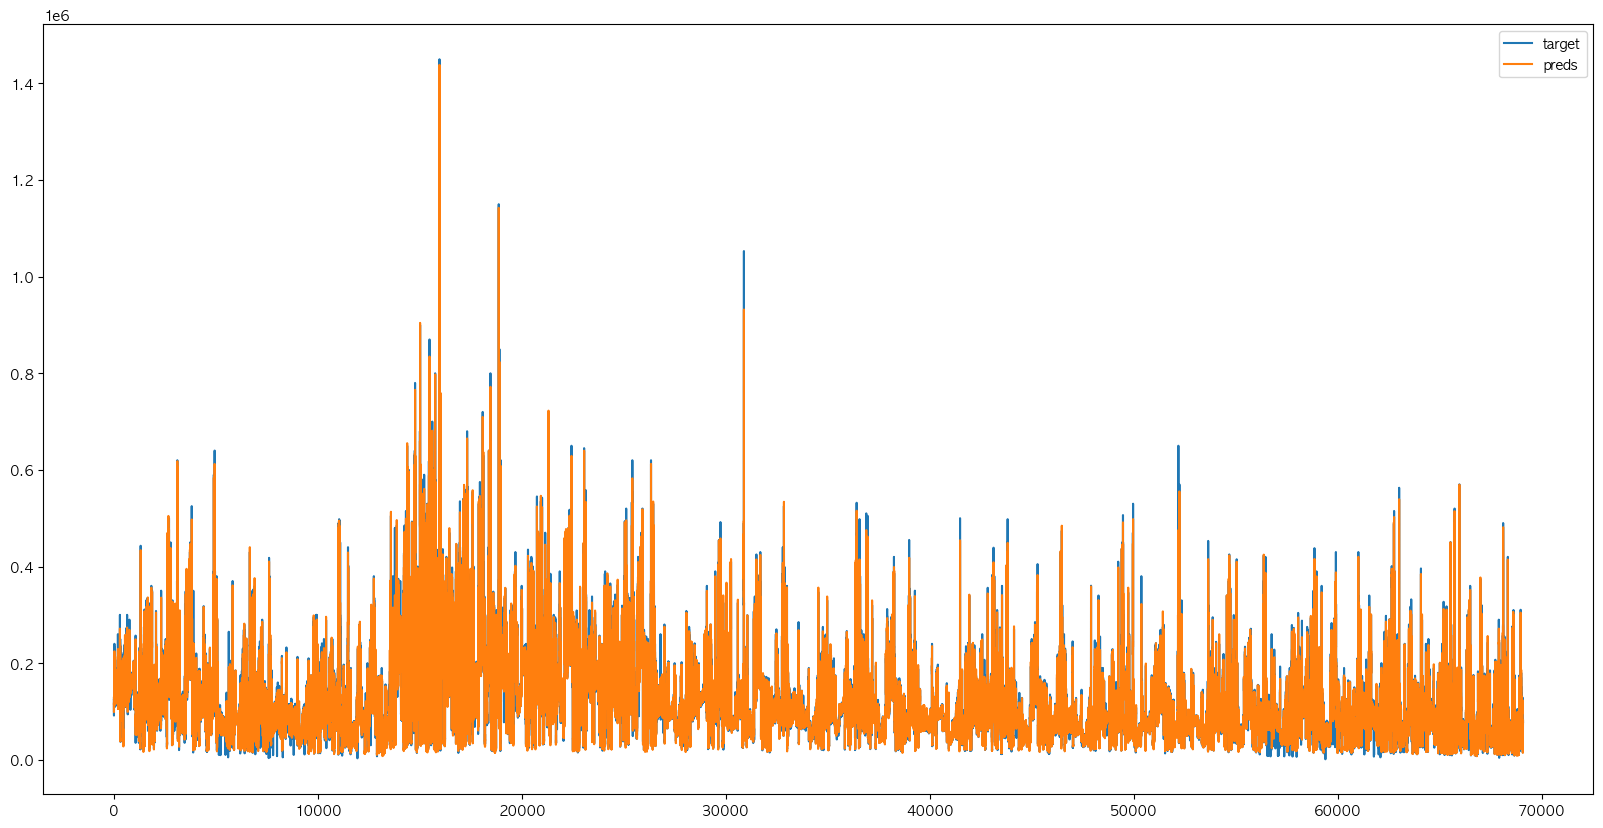

In [51]:
plt.figure(figsize=(20, 10))
tmp['target'].plot(label='target')
tmp['preds'].plot(label='preds')
plt.legend()
plt.show()

In [58]:
tmp2 = pd.DataFrame(tmp.groupby('계약년월')['target'].mean()).reset_index()
tmp2

,계약년월,target
0,200701,60014.643979
1,200702,61114.664557
2,200703,56418.932692
3,200704,67416.182390
4,200705,71905.342593
...,...,...
193,202302,176959.381443
194,202303,207304.232804
195,202304,224626.050000
196,202305,212485.223881


<Axes: >

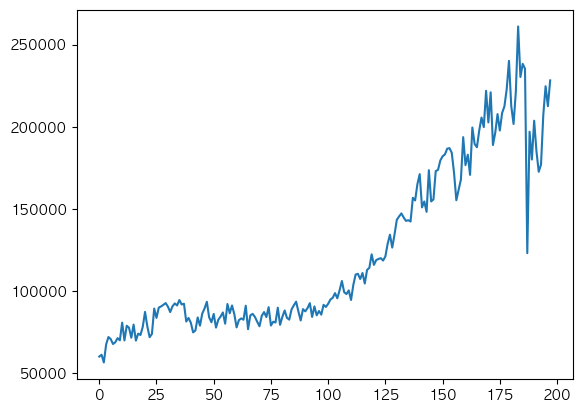

In [60]:
tmp2['target'].plot()

# 강동구 분석

In [35]:
tmp = df_list[1][['아파트명', '구', 'target', 'preds']]
tmp.reset_index(drop=True, inplace=True)
tmp

,아파트명,구,target,preds
0,강일리버파크10단지,강동구,59500.0,57326
1,강일리버파크10단지,강동구,59500.0,58314
2,강일리버파크10단지,강동구,60000.0,59484
3,강일리버파크10단지,강동구,53800.0,54436
4,강일리버파크10단지,강동구,58000.0,58034
...,...,...,...,...
61890,현진에스페랑스,강동구,26600.0,30534
61891,대우한강베네시티,강동구,59660.0,63057
61892,대우한강베네시티,강동구,50713.0,56883
61893,대우한강베네시티,강동구,61494.0,59911


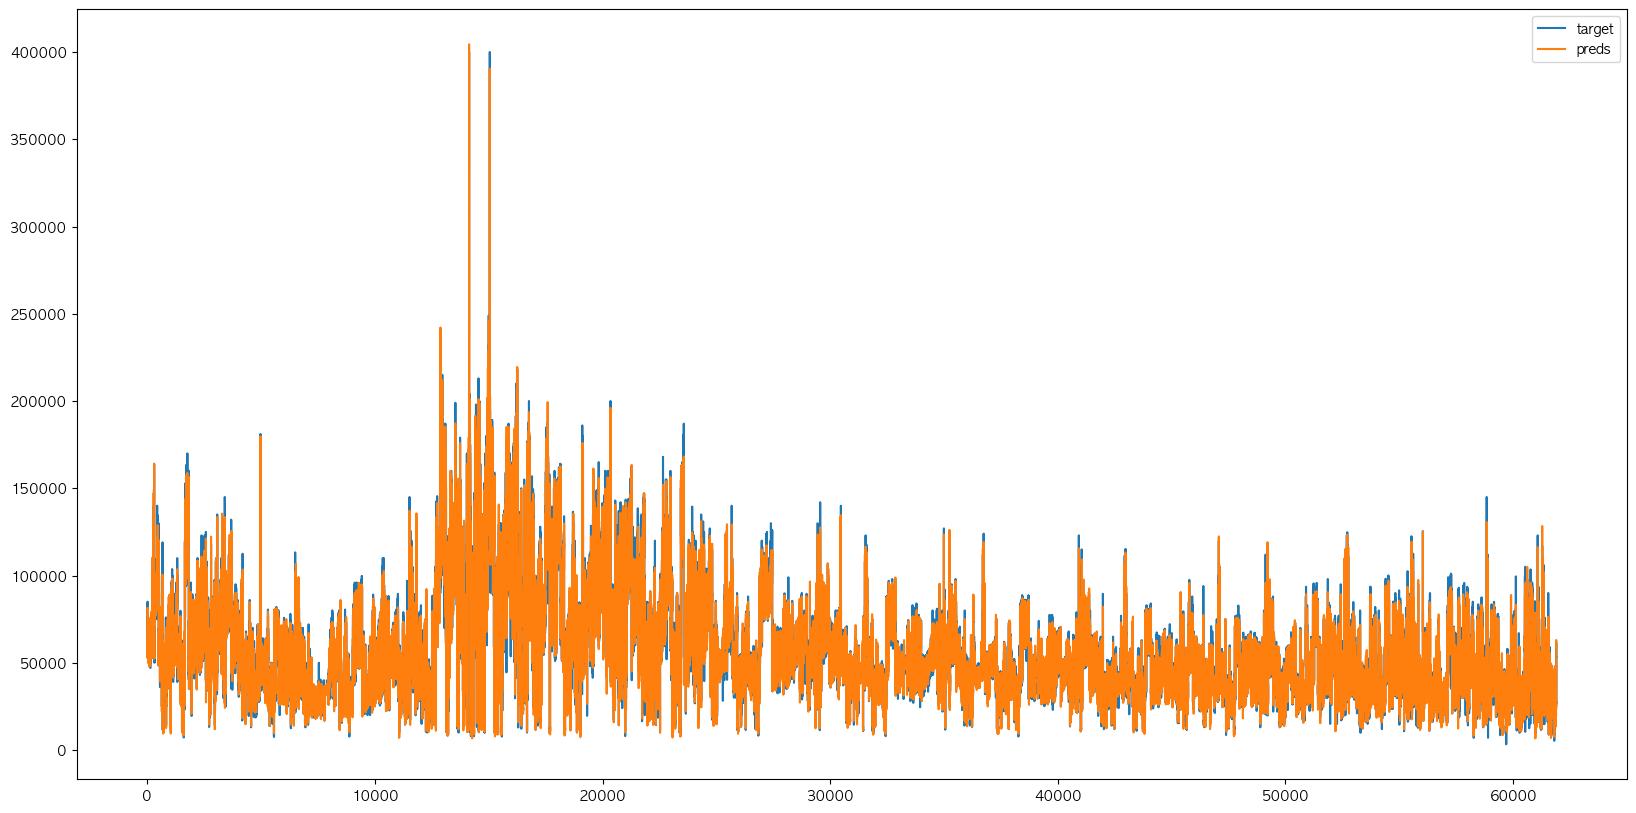

In [36]:
plt.figure(figsize=(20, 10))
tmp['target'].plot(label='target')
tmp['preds'].plot(label='preds')
plt.legend()
plt.show()

# 강북구

['강북구']


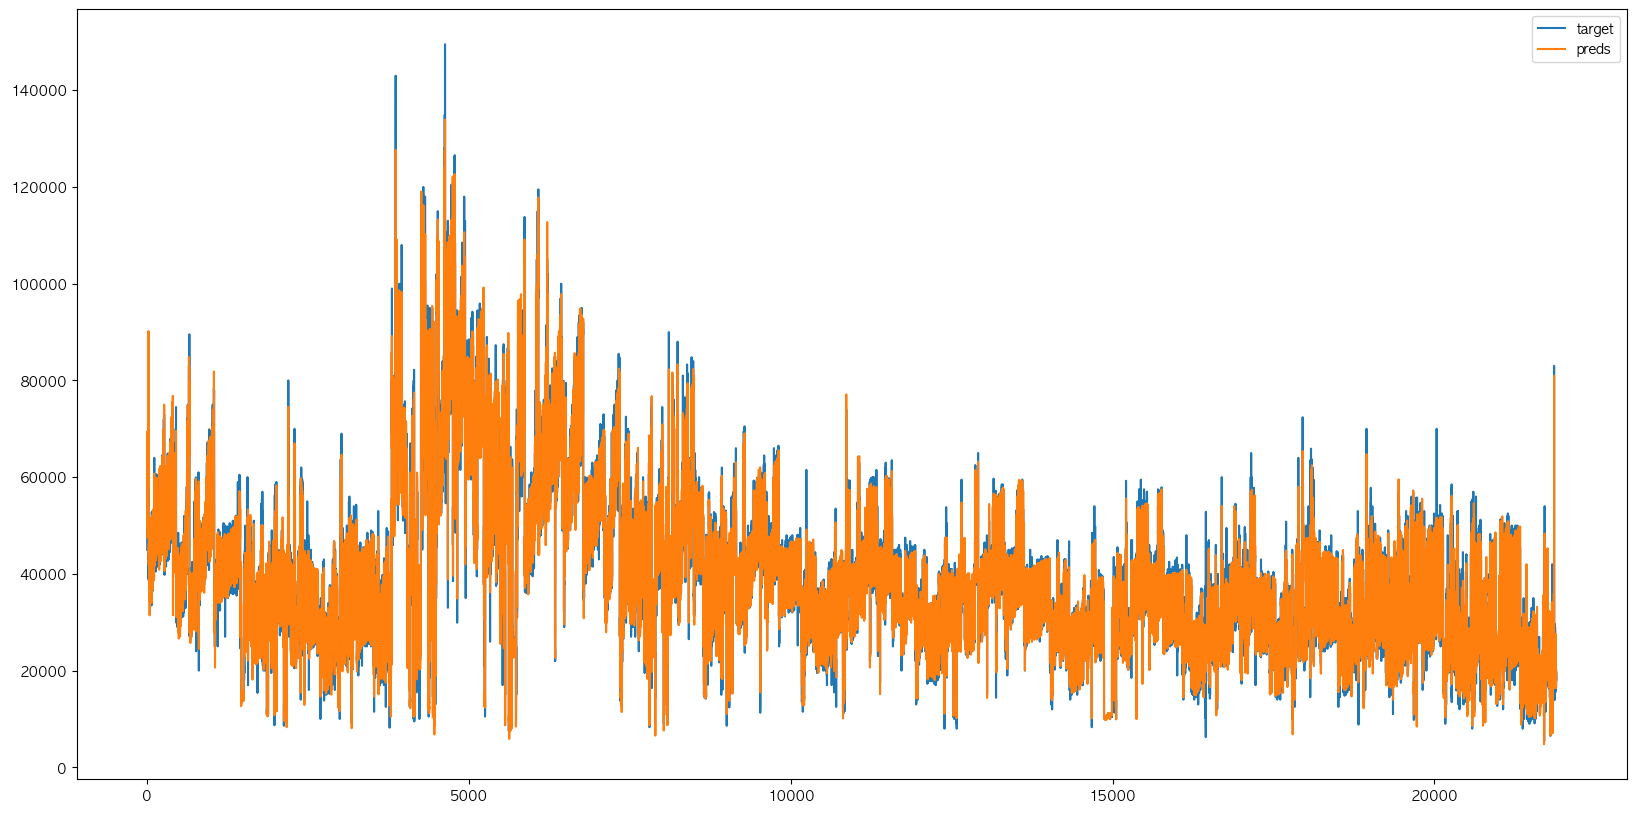

In [39]:
tmp = df_list[2][['아파트명', '구', 'target', 'preds']]
tmp.reset_index(drop=True, inplace=True)
print(tmp['구'].unique())

plt.figure(figsize=(20, 10))
tmp['target'].plot(label='target')
tmp['preds'].plot(label='preds')
plt.legend()
plt.show()

# 강서구 

['강서구']


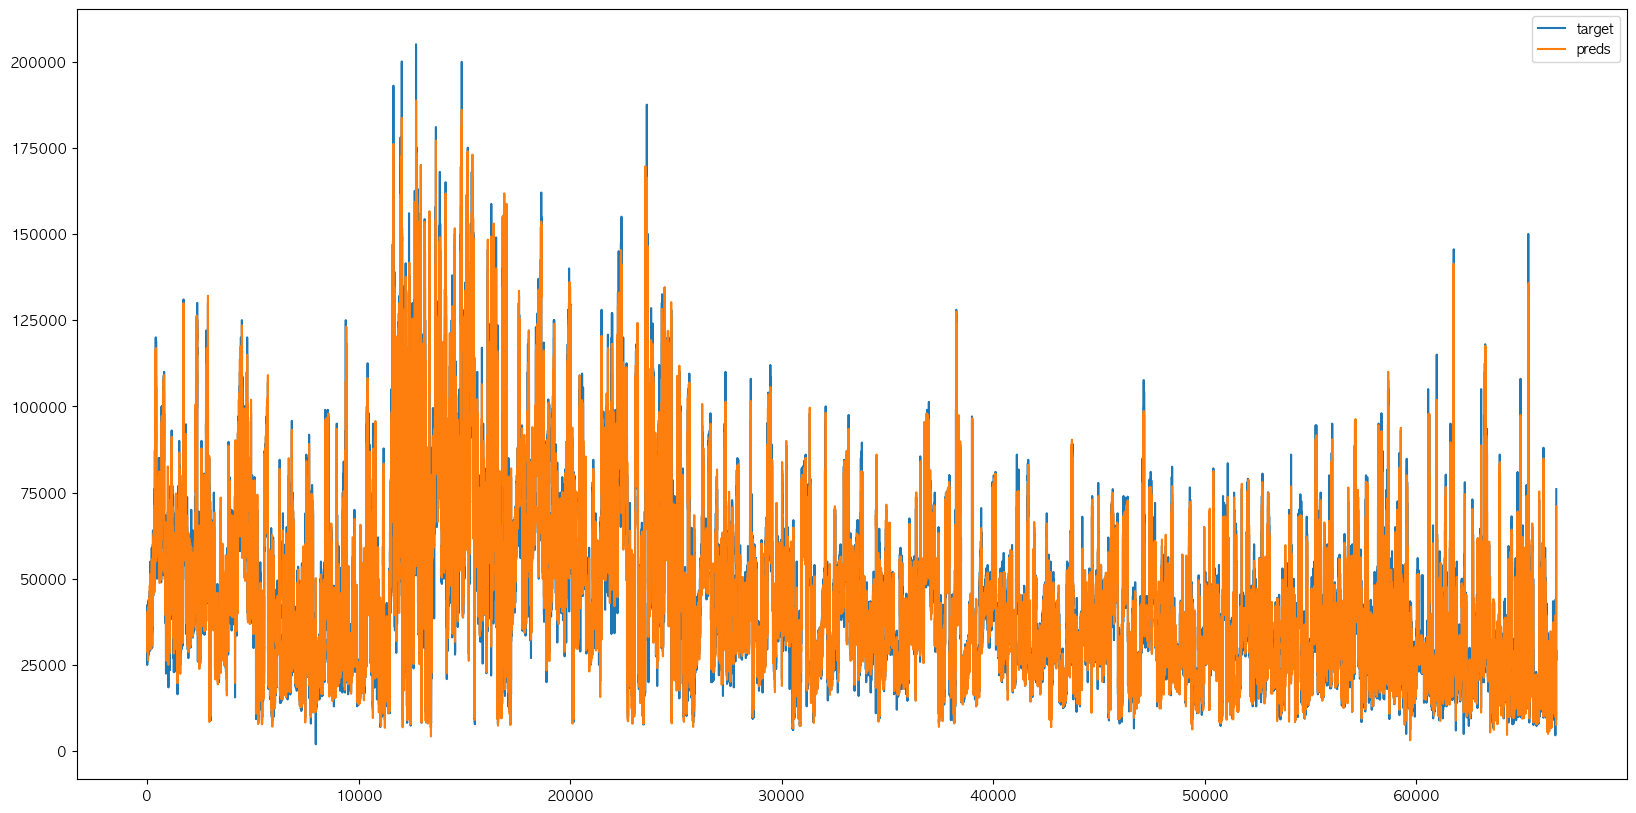

In [40]:
tmp = df_list[3][['아파트명', '구', 'target', 'preds']]
tmp.reset_index(drop=True, inplace=True)
print(tmp['구'].unique())

plt.figure(figsize=(20, 10))
tmp['target'].plot(label='target')
tmp['preds'].plot(label='preds')
plt.legend()
plt.show()

# 관악구

['관악구']


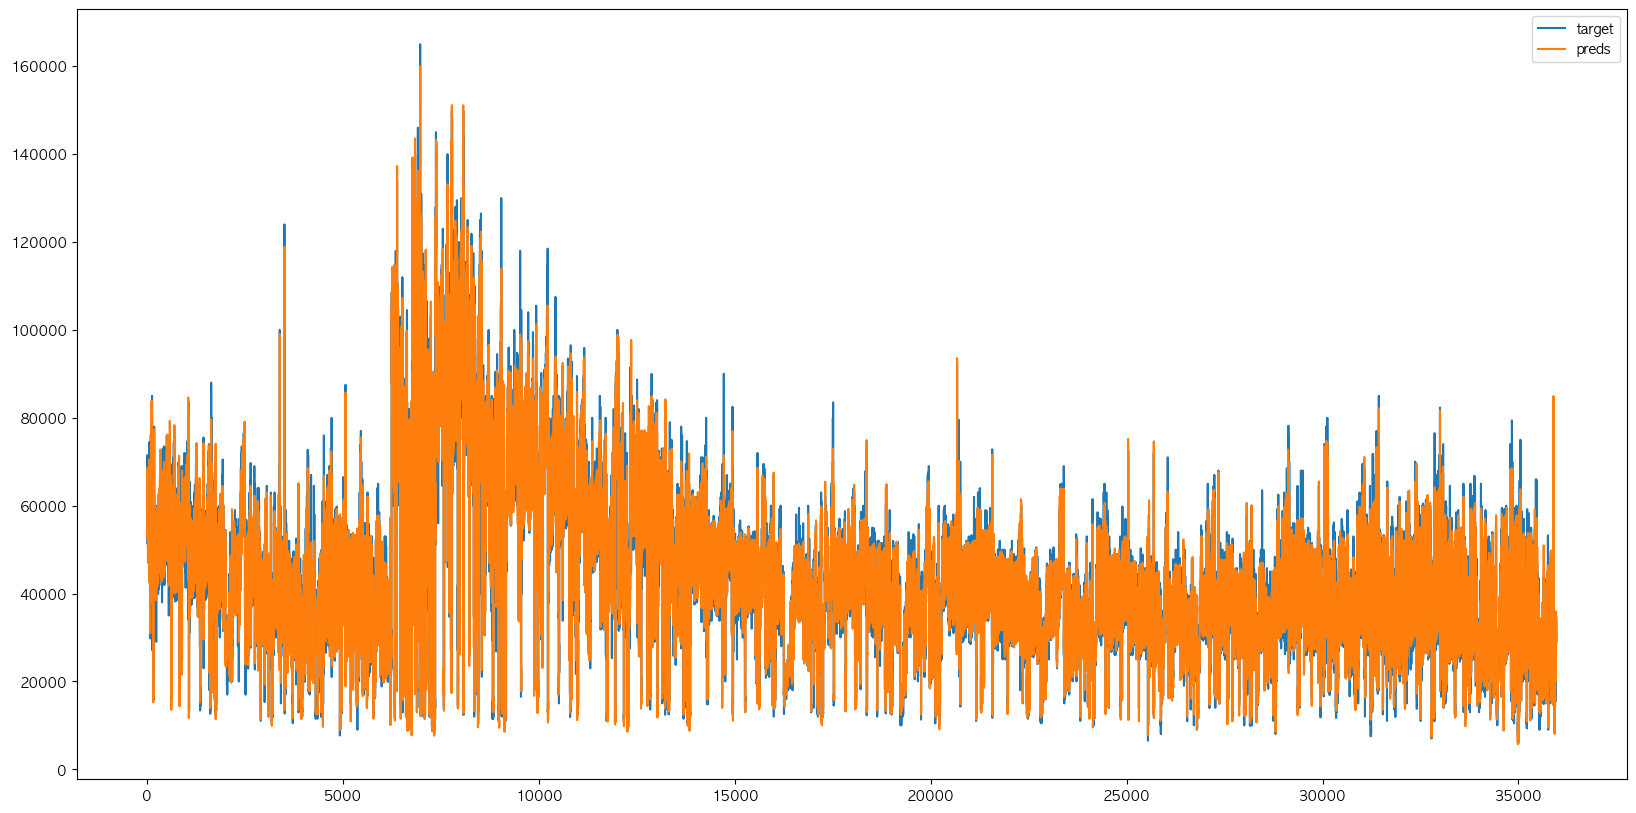

In [41]:
tmp = df_list[4][['아파트명', '구', 'target', 'preds']]
tmp.reset_index(drop=True, inplace=True)
print(tmp['구'].unique())

plt.figure(figsize=(20, 10))
tmp['target'].plot(label='target')
tmp['preds'].plot(label='preds')
plt.legend()
plt.show()

# 광진구

['광진구']


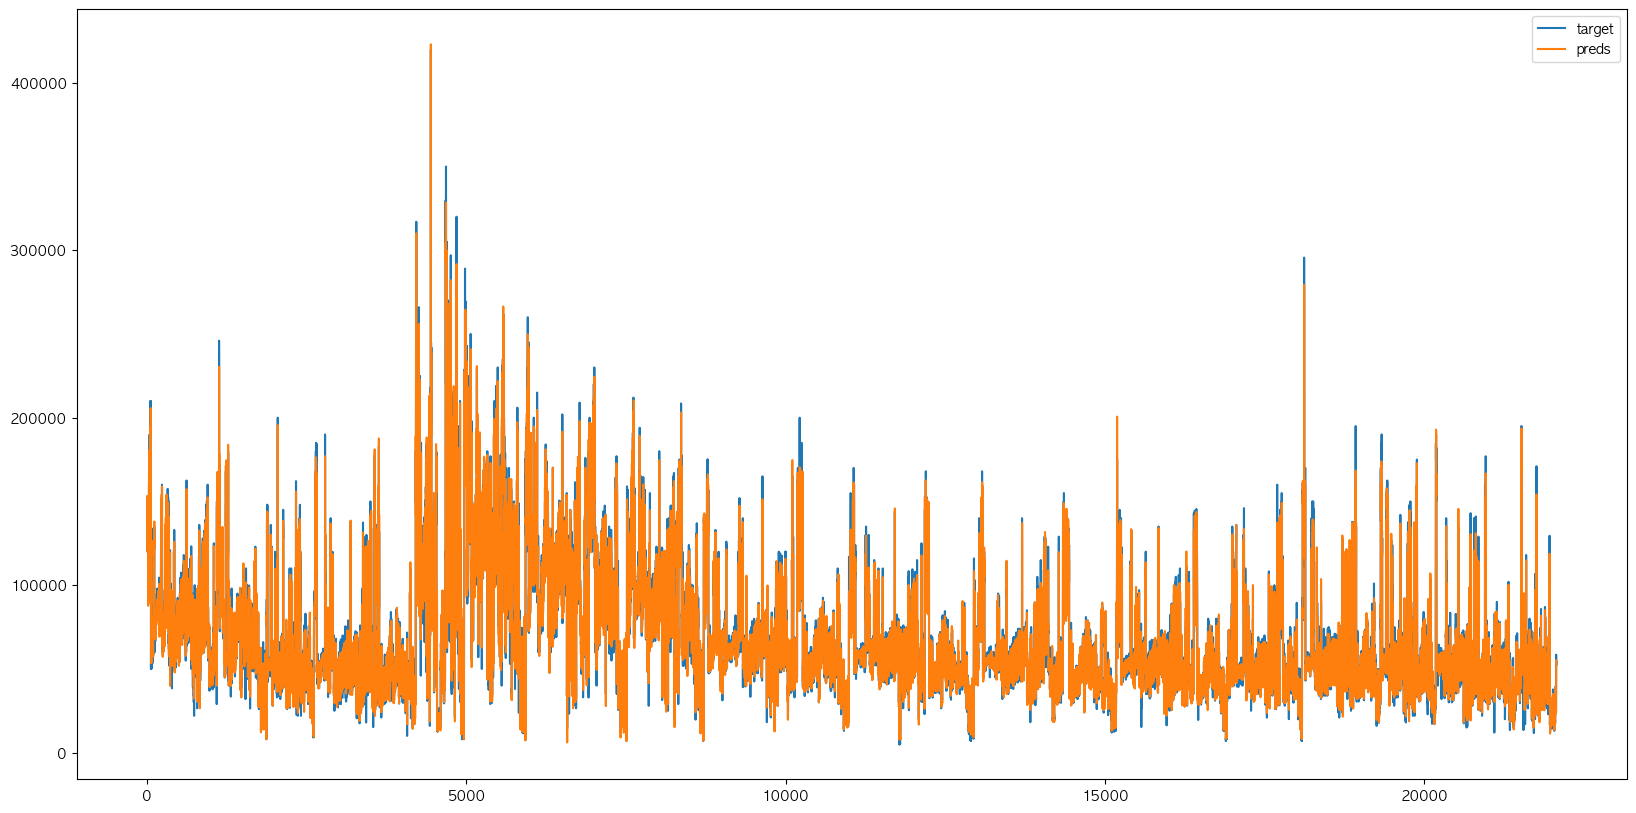

In [44]:
tmp = df_list[5][['아파트명', '구', 'target', 'preds']]
tmp.reset_index(drop=True, inplace=True)
print(tmp['구'].unique())

plt.figure(figsize=(20, 10))
tmp['target'].plot(label='target')
tmp['preds'].plot(label='preds')
plt.legend()
plt.show()

# 구로구

['구로구']


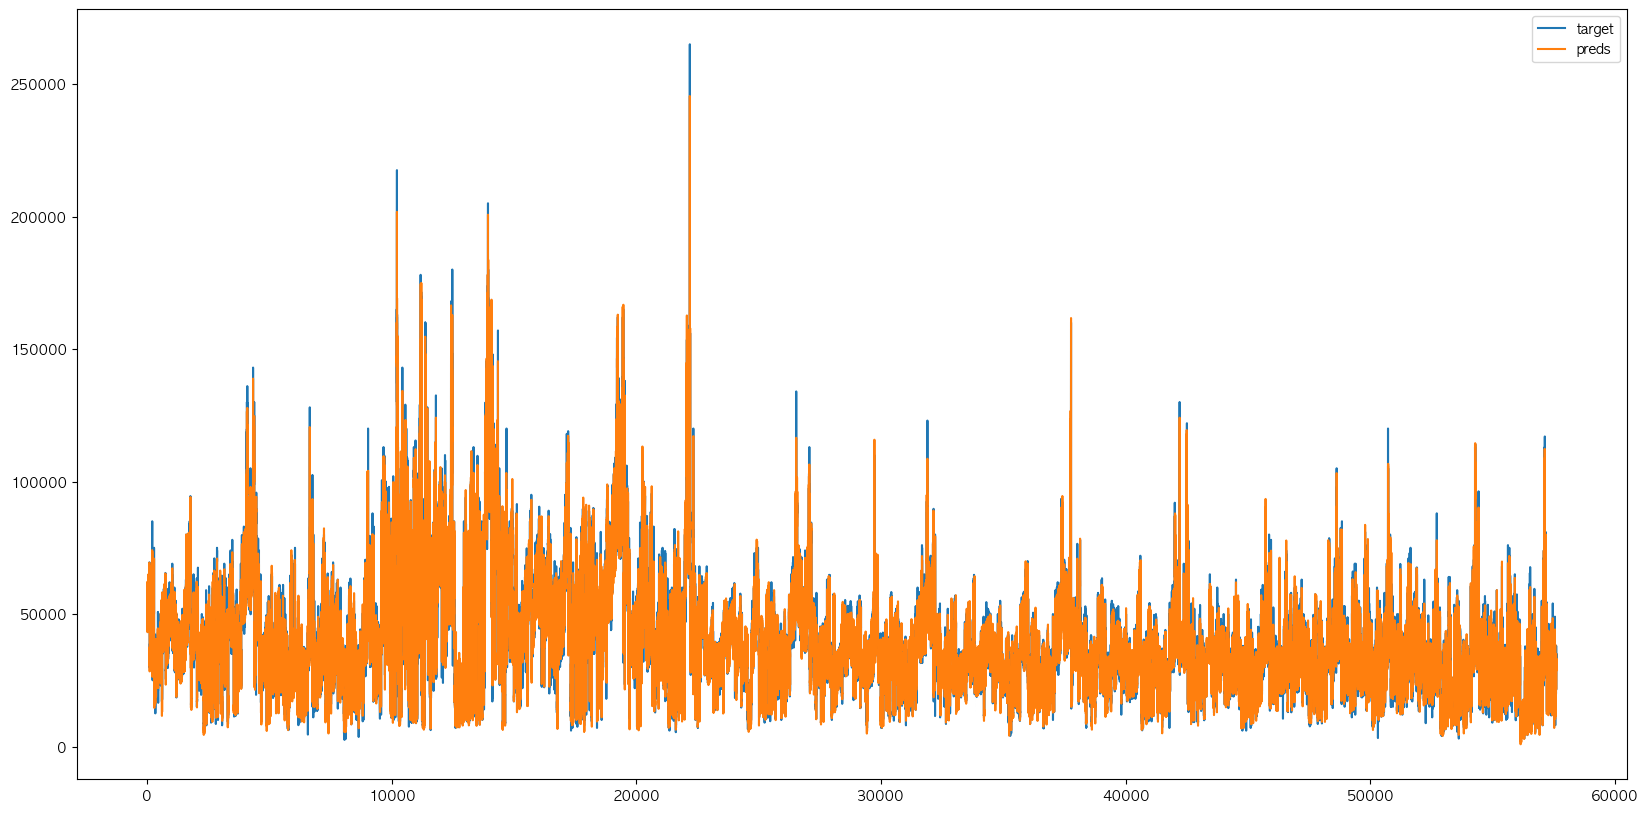

In [45]:
tmp = df_list[6][['아파트명', '구', 'target', 'preds']]
tmp.reset_index(drop=True, inplace=True)
print(tmp['구'].unique())

plt.figure(figsize=(20, 10))
tmp['target'].plot(label='target')
tmp['preds'].plot(label='preds')
plt.legend()
plt.show()

# 금천구

['금천구']


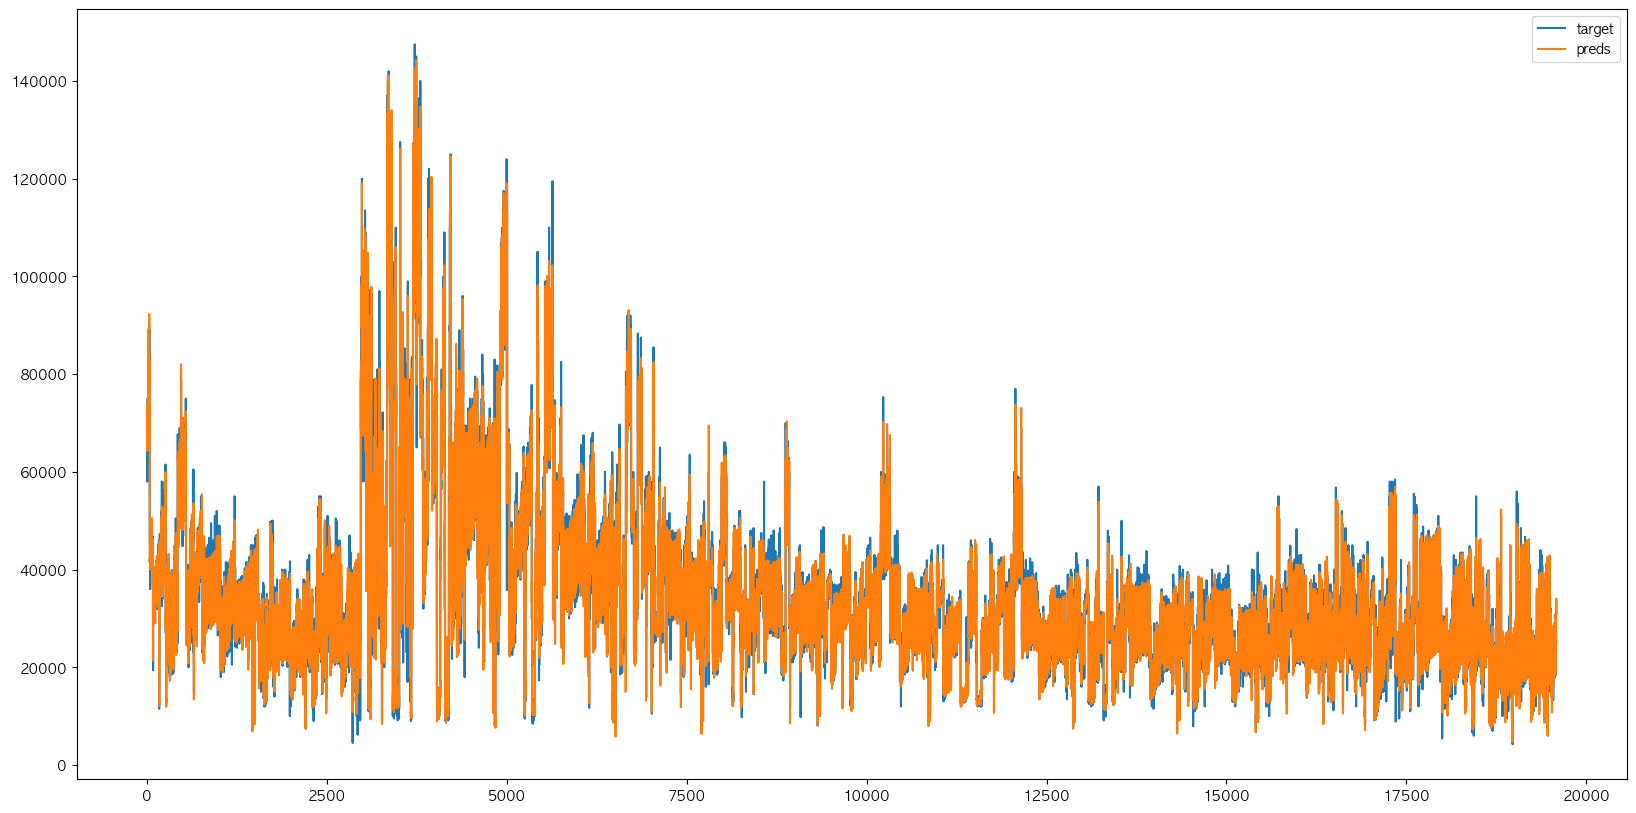

In [46]:
tmp = df_list[7][['아파트명', '구', 'target', 'preds']]
tmp.reset_index(drop=True, inplace=True)
print(tmp['구'].unique())

plt.figure(figsize=(20, 10))
tmp['target'].plot(label='target')
tmp['preds'].plot(label='preds')
plt.legend()
plt.show()

# 노원구

['노원구']


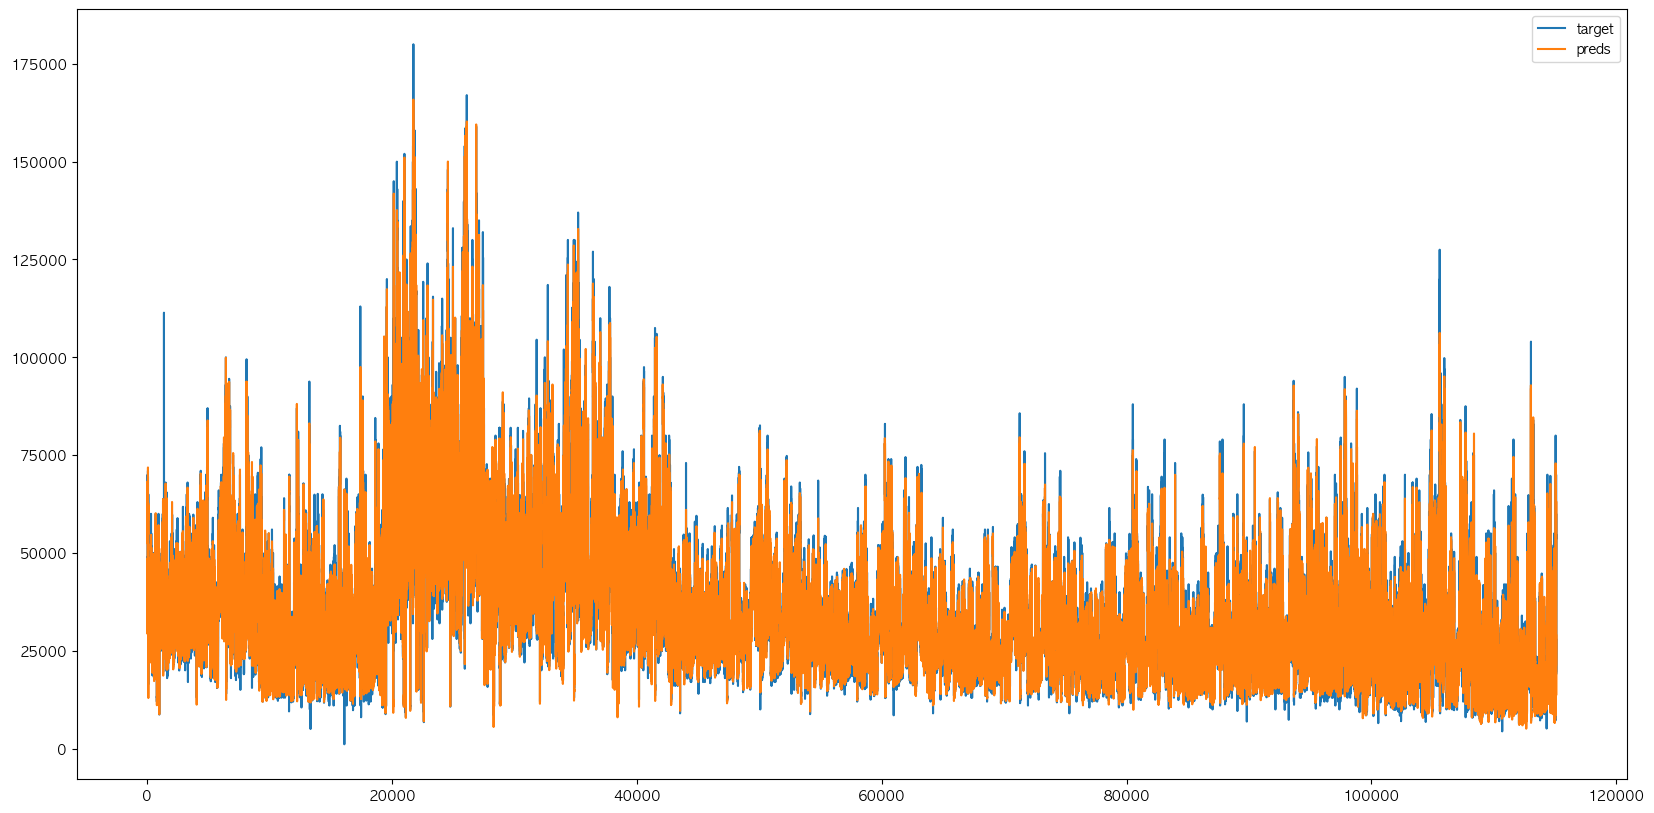

In [47]:
tmp = df_list[8][['아파트명', '구', 'target', 'preds']]
tmp.reset_index(drop=True, inplace=True)
print(tmp['구'].unique())

plt.figure(figsize=(20, 10))
tmp['target'].plot(label='target')
tmp['preds'].plot(label='preds')
plt.legend()
plt.show()

# 도봉구

['도봉구']


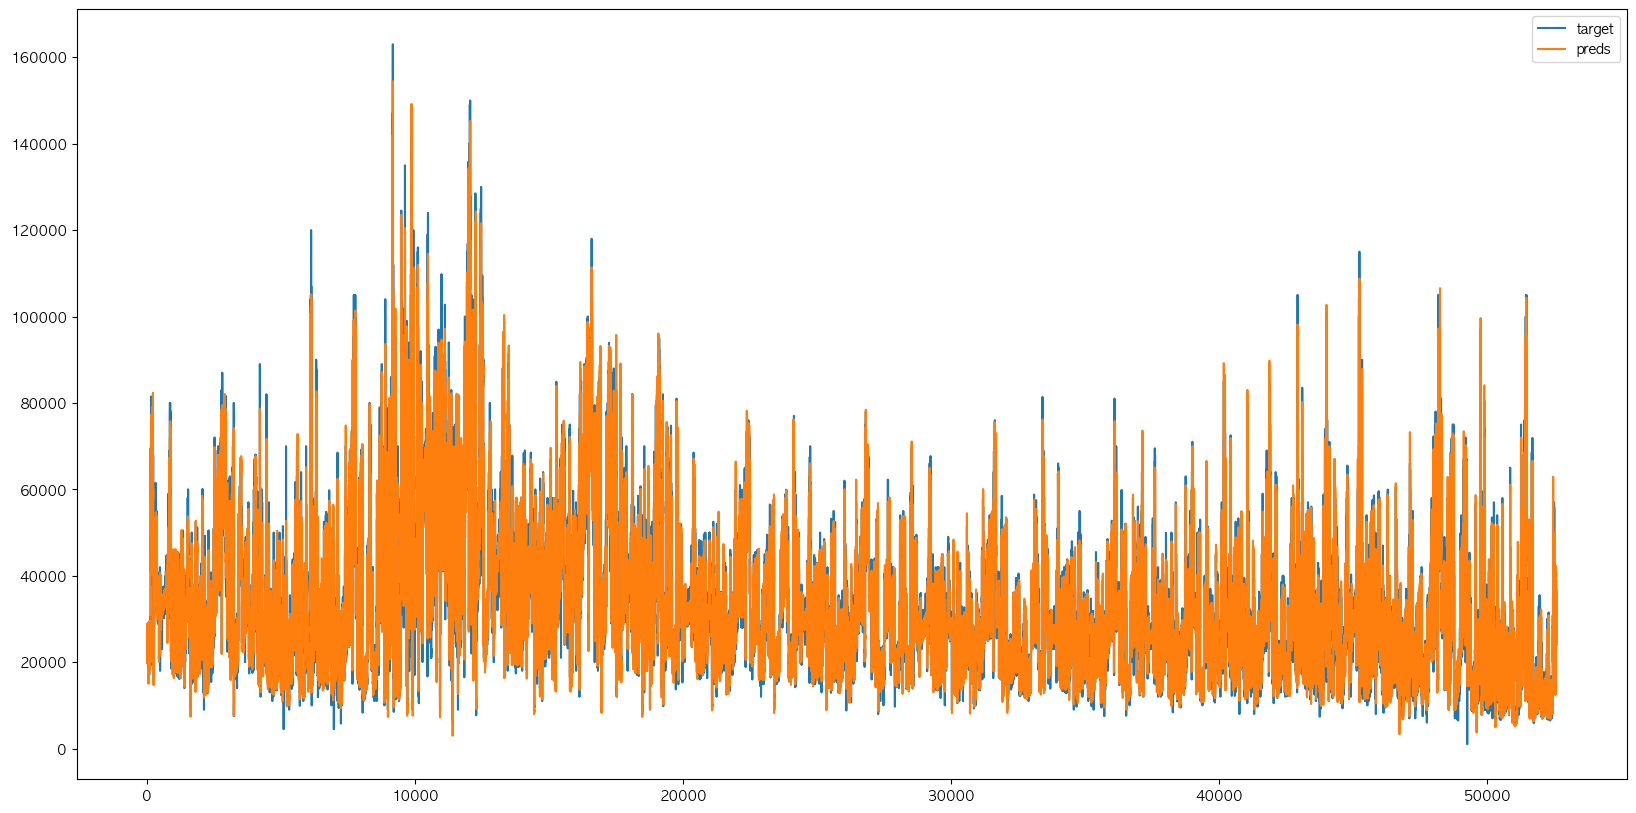

In [48]:
tmp = df_list[9][['아파트명', '구', 'target', 'preds']]
tmp.reset_index(drop=True, inplace=True)
print(tmp['구'].unique())

plt.figure(figsize=(20, 10))
tmp['target'].plot(label='target')
tmp['preds'].plot(label='preds')
plt.legend()
plt.show()

# 동대문구

['동대문구']


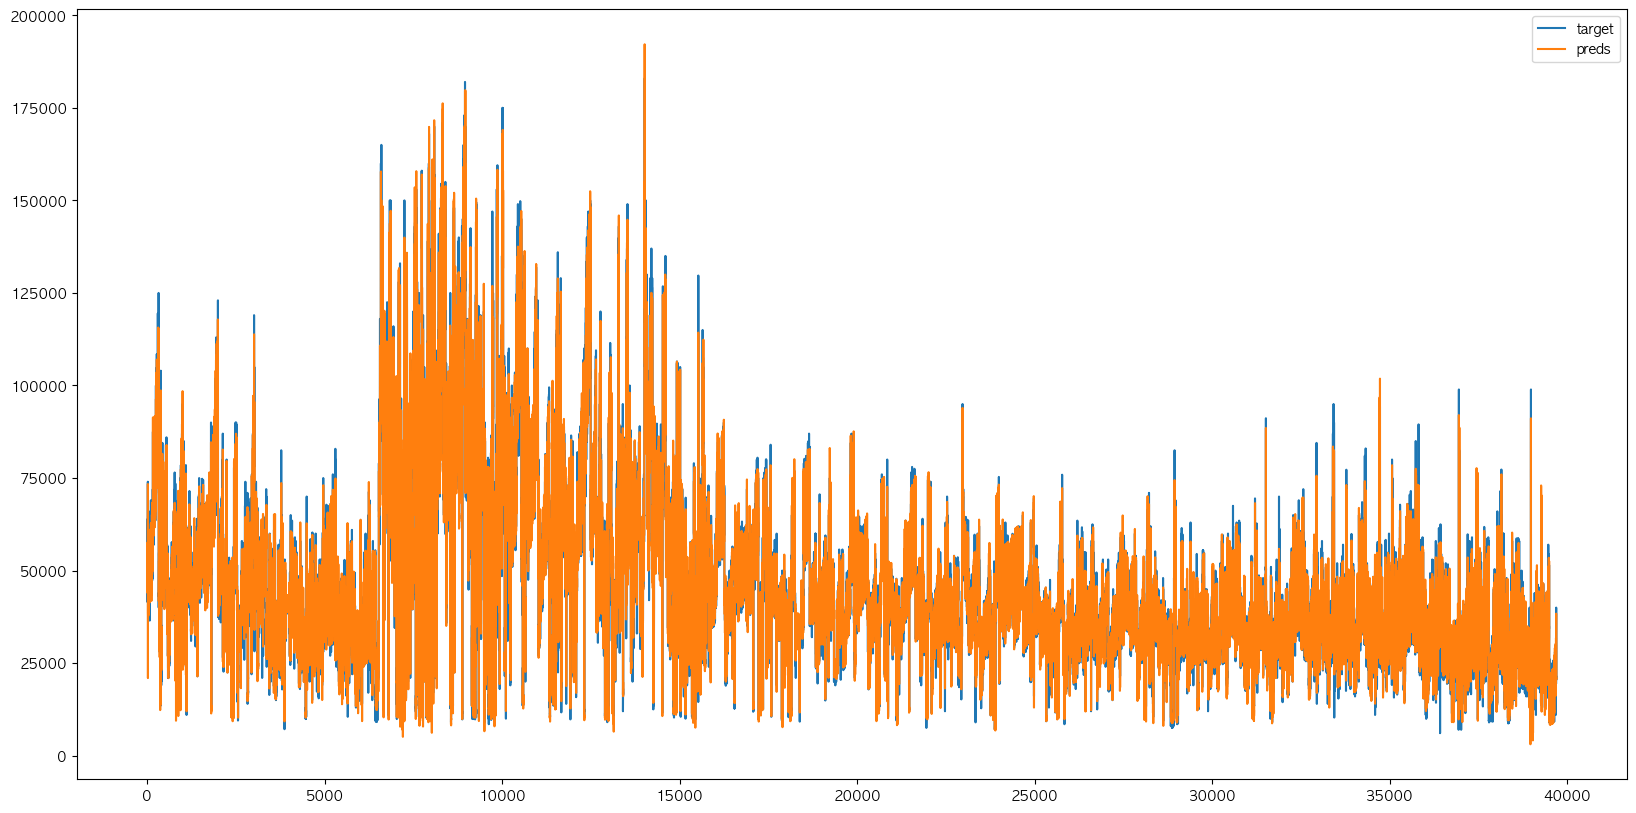

In [49]:
tmp = df_list[10][['아파트명', '구', 'target', 'preds']]
tmp.reset_index(drop=True, inplace=True)
print(tmp['구'].unique())

plt.figure(figsize=(20, 10))
tmp['target'].plot(label='target')
tmp['preds'].plot(label='preds')
plt.legend()
plt.show()